<a href="https://colab.research.google.com/github/PajeSystems/PUC.MVP/blob/main/Boaz_MVP_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Hsys

Trabalho de conclusão de Disciplina de Engenharia de Dados

**Introdução**

O tema proposto é a Hipertensão Arterial e suas complicações, identificados como problema de saúde pública. Supõe-se que aplicar recursos de Machine Learning é possível mitigar complicações.

**Objetivo Principal**

Criar um MVP de sistema para monitoramento de hipertensão arterial, integrando processos de coleta de dados biométricos, análise e predição de risco de emergências hipertensivas.

**Metodologia**

*O Método Experimental:*

• Formulação da Hipótese de que um sistema computacional especialista, sustentado por Machine Learning e Telemedicina, podem otimizar processos assistenciais de Hipertensão Arterial.

• Experimentação controlada por simulação computacional, onde a variável independente em observação científica é a Pressão Arterial Média-PAM.

• Coleta de Dados fictícia, por comandos computacionais na criação de DATASET.01_MVP01, com 10.000 eventos simulados de verificação da pressão arterial com seus valores aleatórios de população distribuída em sexo masculino e feminino, maiores de 40 anos de idade.



• Seleção simulada de 100 indivíduos com dados biométricos de maior criticidade expressos em DATASET.02_MVP01.



# Experimento 1
Criar nova tabela a partir do DATASET_CSV_MVP01, classificando individuos maiores de 60 anos, separados por sexo e com PAM maior que 110.

Referência para:
"DATASET_CSV_MVP01.csv"

### Tarefa 1
Ler a base de dados "DATASET_CSV_MVP01.csv" usando o Pandas.

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('DATASET_CSV_MVP01.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'DATASET_CSV_MVP01.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Id,Nome,CEP,Idade,Sexo,PAS,PAD,FC,PAM
0,1,YAT8007,19858814,53,M,120,84,58,96
1,2,WEK5072,92288610,99,M,148,120,93,129
2,3,TUP6313,81121069,59,F,140,120,54,126
3,4,XKI5723,30554900,70,M,172,106,90,128
4,5,QGQ1204,85534548,64,F,142,75,77,97


## Analisando os dados



In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types and missing values
print("\nInfo:")
df.info()

# Identify missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Initial summary statistics
print("\nSummary statistics:\n", df.describe())

# Explore unique values in categorical columns
for col in ['Sexo']:  # Only 'Sexo' appears to be categorical
    print(f"\nUnique values in '{col}':\n{df[col].unique()}")
    print(f"\nValue counts for '{col}':\n{df[col].value_counts()}")

Shape of the DataFrame: (10000, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      10000 non-null  int64 
 1   Nome    10000 non-null  object
 2   CEP     10000 non-null  int64 
 3   Idade   10000 non-null  int64 
 4   Sexo    10000 non-null  object
 5   PAS     10000 non-null  int64 
 6   PAD     10000 non-null  int64 
 7   FC      10000 non-null  int64 
 8   PAM     10000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 703.3+ KB

Missing values per column:
 Id       0
Nome     0
CEP      0
Idade    0
Sexo     0
PAS      0
PAD      0
FC       0
PAM      0
dtype: int64

Summary statistics:
                 Id           CEP         Idade         PAS           PAD  \
count  10000.00000  1.000000e+04  10000.000000  10000.0000  10000.000000   
mean    5000.50000  5.052712e+07     69.962000    139.0255     90.410300   
std     2886

## Visualizando os dados



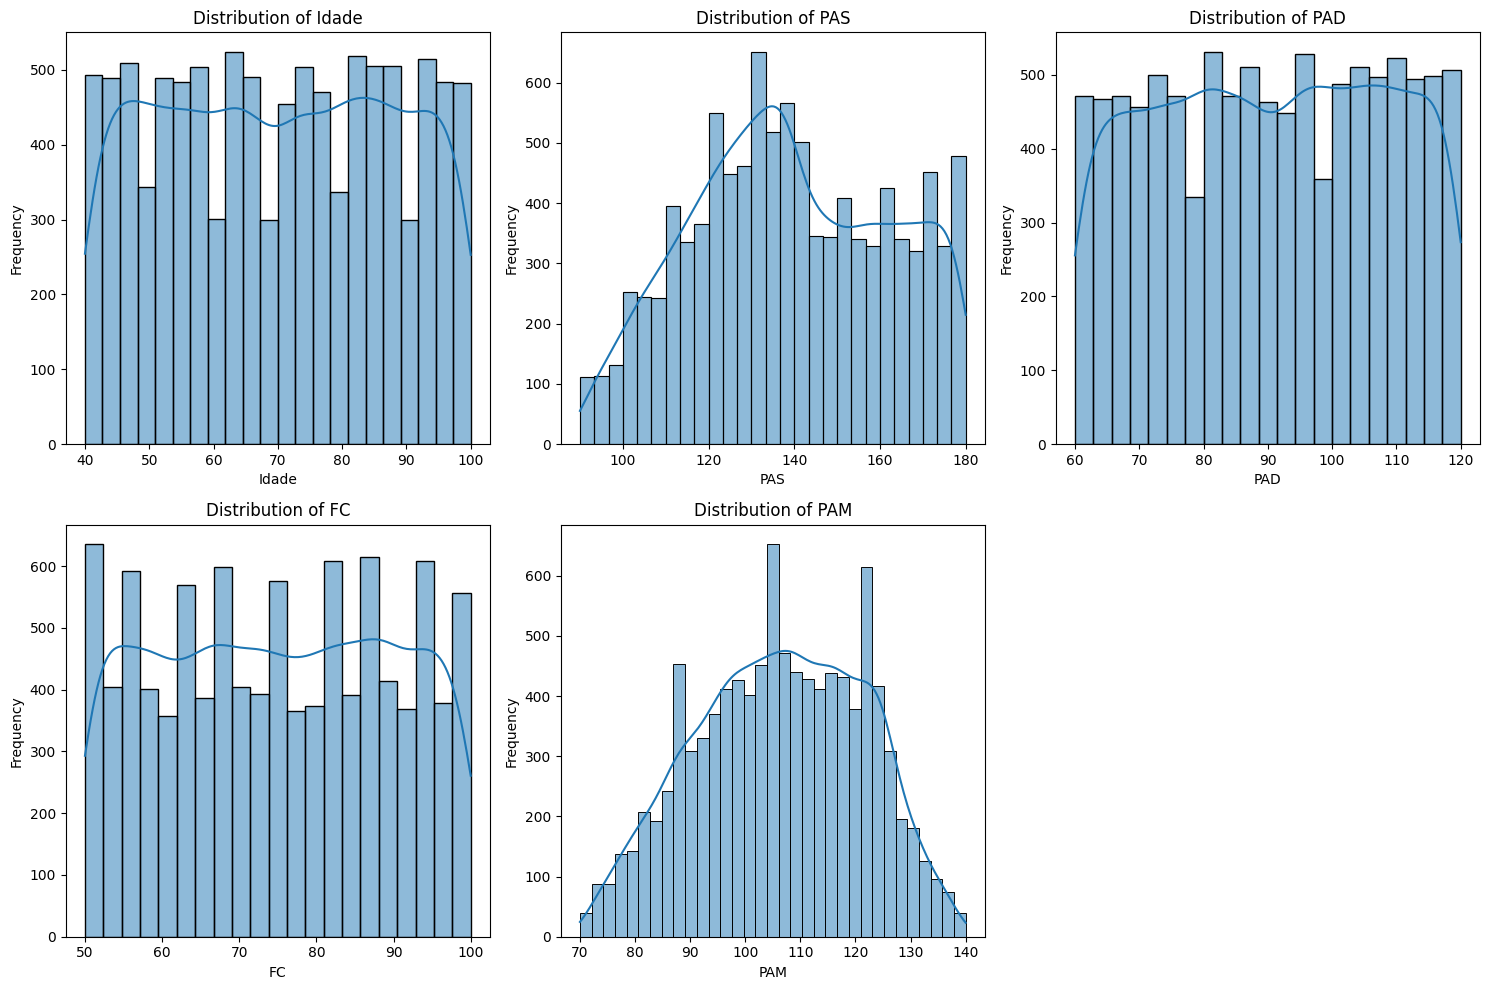

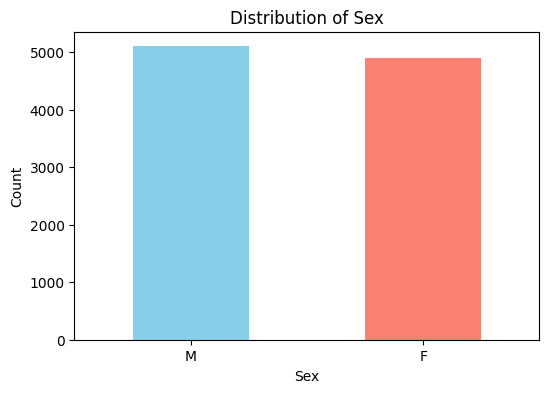

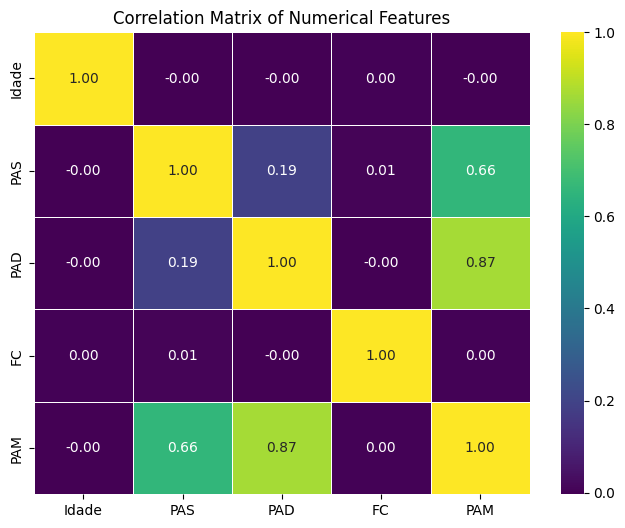

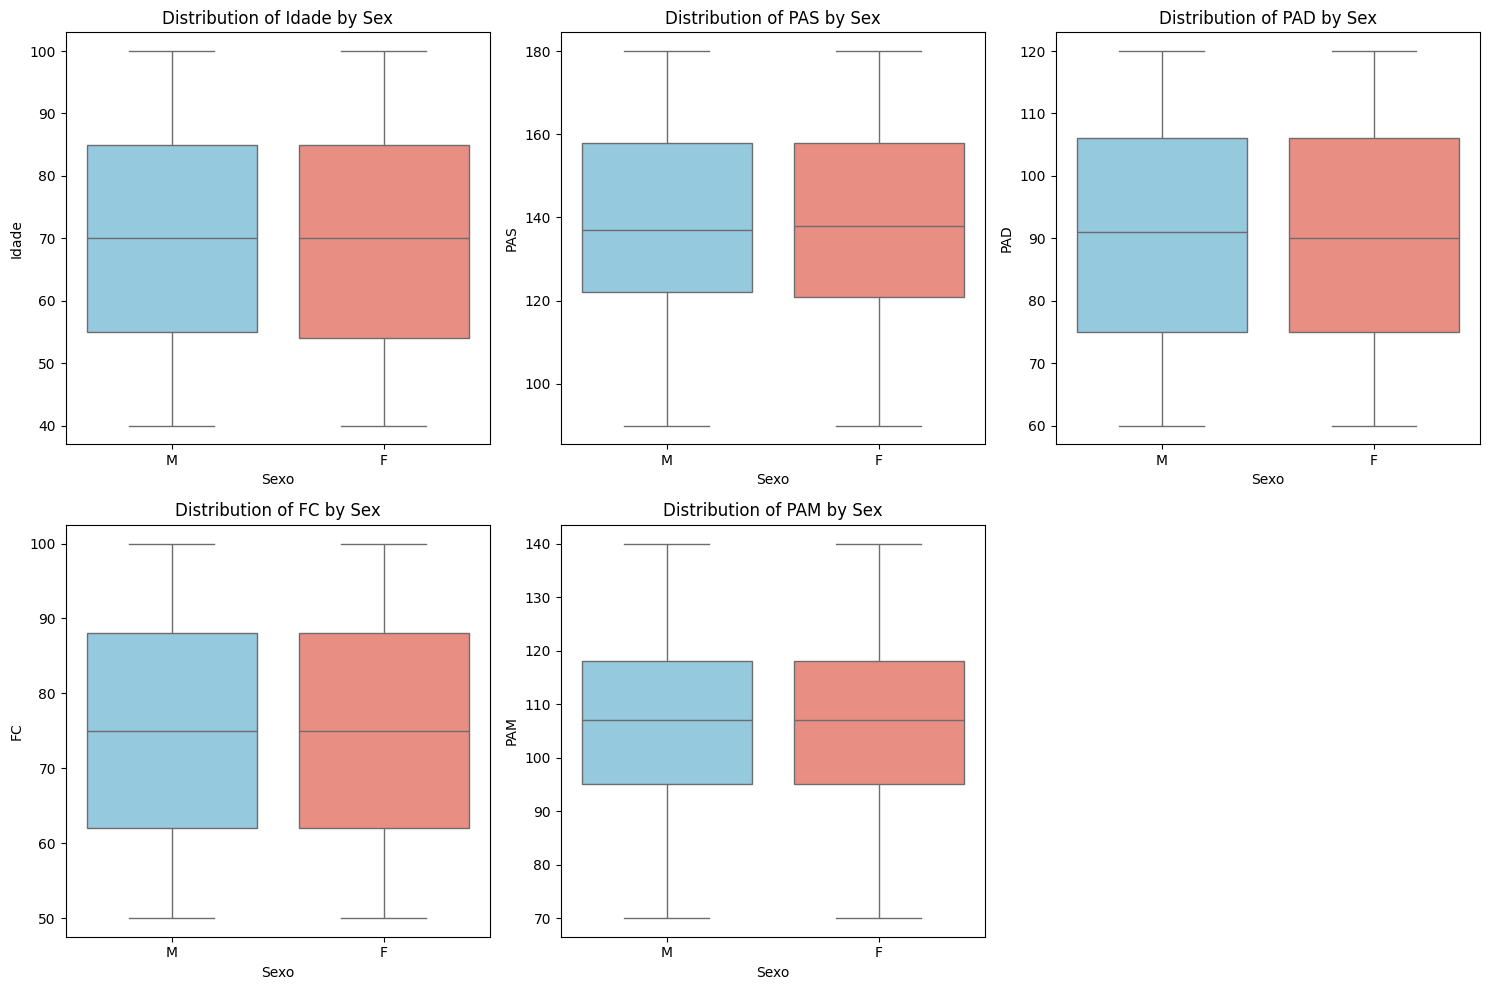

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for numerical features
plt.figure(figsize=(15, 10))
numerical_features = ['Idade', 'PAS', 'PAD', 'FC', 'PAM']
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Bar chart for 'Sexo'
plt.figure(figsize=(6, 4))
df['Sexo'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 3. Enhanced Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 4. Box plots for numerical features by 'Sexo'
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Sexo', y=col, data=df, hue='Sexo', palette=['skyblue', 'salmon'], legend=False)
    plt.title(f'Distribution of {col} by Sex')
plt.tight_layout()
plt.show()

# Experimento 2

Ler, analisar e consultar as tabelas do DATASET2_CSV_MVP01, para identificar evidências através das tarefas:



Tarefa 1

Identificar individuos do sexo masculino, maiores de 65 anos com PAM maior que 120 mmHg